In [1]:
import os
os.chdir('C://Users//vnino//Desktop//U//CE888 Data Science//Assignment 1//Final Datasets//HHAR//Activity recognition exp')

In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['text.latex.preamble']=[r"\usepackage{amssymb}",
                                     r"\usepackage{amsmath}"]

In [3]:
df = pd.read_csv("Phones_accelerometer.csv")

In [4]:
df.head()

,Index,Arrival_Time,Creation_Time,x,y,z,User,Model,Device,gt
0,0,1424696633908,1424696631913248572,-5.958191,0.688065,8.135345,a,nexus4,nexus4_1,stand
1,1,1424696633909,1424696631918283972,-5.952240,0.670212,8.136536,a,nexus4,nexus4_1,stand
2,2,1424696633918,1424696631923288855,-5.995087,0.653549,8.204376,a,nexus4,nexus4_1,stand
3,3,1424696633919,1424696631928385290,-5.942718,0.676163,8.128204,a,nexus4,nexus4_1,stand
4,4,1424696633929,1424696631933420691,-5.991516,0.641647,8.135345,a,nexus4,nexus4_1,stand


In [5]:
df.describe()

,Index,Arrival_Time,Creation_Time,x,y,z
count,1.306248e+07,1.306248e+07,1.306248e+07,1.306248e+07,1.306248e+07,1.306248e+07
mean,1.240761e+05,1.424745e+12,6.807797e+17,-1.704579e+00,1.595409e-01,8.931753e+00
std,9.239057e+04,4.390389e+07,7.116076e+17,3.859088e+00,1.552040e+00,2.262952e+00
min,0.000000e+00,1.424687e+12,4.507724e+11,-3.881207e+01,-2.249512e+01,-1.342387e+01
25%,5.112700e+04,1.424697e+12,5.523131e+13,-4.012682e+00,-6.961212e-01,7.738060e+00
50%,1.037980e+05,1.424778e+12,3.506028e+14,-2.145178e+00,1.532270e-01,9.063251e+00
75%,1.740970e+05,1.424783e+12,1.424778e+18,-1.532270e-01,1.037979e+00,9.921814e+00
max,3.963370e+05,1.424789e+12,1.424791e+18,2.792894e+01,2.080815e+01,3.931801e+01


In [6]:
#Filtering only for Samsung Gold Device
df_device=df[(df.Device == "samsungold_1")]

In [7]:
# Plotting example of sequencial coordinates
def plot_activity(activity, df):
    data = df[df['gt'] == activity][['x', 'y', 'z']][:200]
    axis = data.plot(subplots=True, figsize=(7,5))
    for i in range(3):
        axis[i].legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))
        axis[i].xaxis.set_major_formatter(plt.NullFormatter())
        if i==0:
            axis[i].set_ylim([-15,5])
        if i==1:
            axis[i].set_ylim([-4,6])
        if i==2:
            axis[i].set_ylim([2,16])


C:\Users\vnino\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


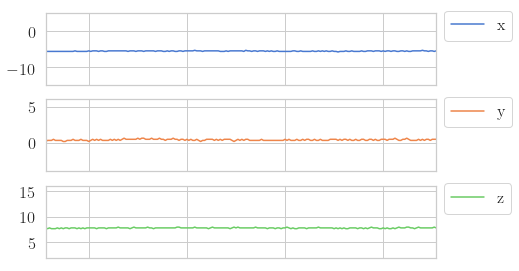

In [8]:
plot_activity("stand", df_device[(df.User == "a")])

C:\Users\vnino\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


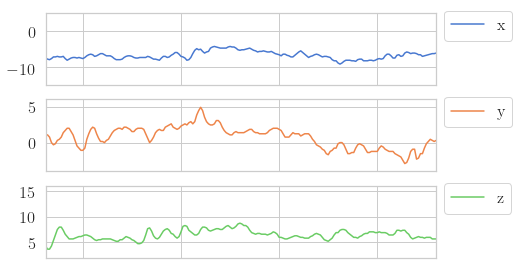

In [279]:
plot_activity("bike", df_device[(df.User == "a")])

C:\Users\vnino\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


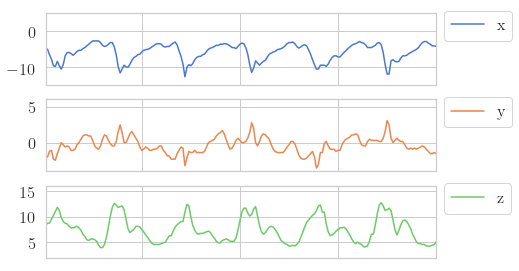

In [280]:
plot_activity("stairsup", df_device[(df.User == "a")])

In [12]:
#Creating tabular data
N_TIME_STEPS = 200
N_FEATURES = 3
step =200
users=df_device['User'].unique()
activities=df_device['gt'].unique()
data=[]
for user in users:
    for activity in activities:
        df2=df_device[(df_device['User']==user) & (df_device['gt'].astype(str)==activity)]
        for i in range(0, len(df2) - N_TIME_STEPS, step):
            xs = df2['x'].values[i: i + N_TIME_STEPS]
            ys = df2['y'].values[i: i + N_TIME_STEPS]
            zs = df2['z'].values[i: i + N_TIME_STEPS]
            a=np.asarray([xs,ys,zs], dtype= np.float32)
            features=np.reshape(a, N_TIME_STEPS*N_FEATURES)
            activity = df2['gt'].values[0]
            user = df2['User'].values[0]
            row=np.append(features,[user,activity,i])
            data.append(row)
        
     

In [13]:
data_array=np.asarray(data)
data_df=pd.DataFrame(data_array)

In [14]:
data_df.shape

(4712, 603)

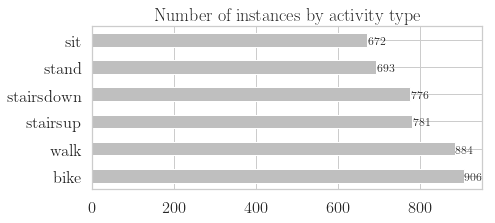

In [15]:
plot1=data_df[601].value_counts().plot(kind='barh', color='0.75', title='Number of instances by activity type', figsize=(7,3));

for i, v in enumerate(data_df[601].value_counts()):
   plot1.text(v + 2, i-0.15 , str(v), fontsize='large')
plot1

In [16]:
data_df[601].value_counts()

bike          906
walk          884
stairsup      781
stairsdown    776
stand         693
sit           672
Name: 601, dtype: int64

In [ ]:
data_df.to_csv("processed_HHAR.csv", sep=',')